In [58]:
import sys
!{sys.executable} -m pip install xgboost

In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import xgboost as xgb

In [63]:
df = pd.read_csv('C:/Users/husza/DataScienceUdemy/ZTMMLC/diabetes-data.csv') # os path I know
df[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [64]:
# Check for duplicates and delete them
df.duplicated().sum()
df.drop_duplicates(inplace=True)

# Check len of df
len(df)

744

In [65]:
# Let's replace zeros with NaN, makes counting them easier
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

df_copy.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [66]:
# Fill numerical values with mean and median
num_imputer_mean = SimpleImputer(strategy='mean')
num_imputer_median = SimpleImputer(strategy='median')

# Define columns = 
num_mean = ['Glucose', 'BloodPressure']
num_median = ['SkinThickness', 'Insulin', 'BMI']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('num_imputer_mean', num_imputer_mean, num_mean),
    ('num_imputer_median', num_imputer_median, num_median)
])

# Split the data
X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X;

In [67]:
df_copy_filled = pd.DataFrame(filled_X,
                             columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])
df_copy_filled.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,138.0,62.000000,35.0,126.0,33.6
1,84.0,82.000000,31.0,125.0,38.2
2,145.0,72.261972,29.0,126.0,44.2
3,135.0,68.000000,42.0,250.0,42.3
4,139.0,62.000000,41.0,480.0,40.7


In [68]:
# Let's check for NaN
df_copy_filled.isna().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

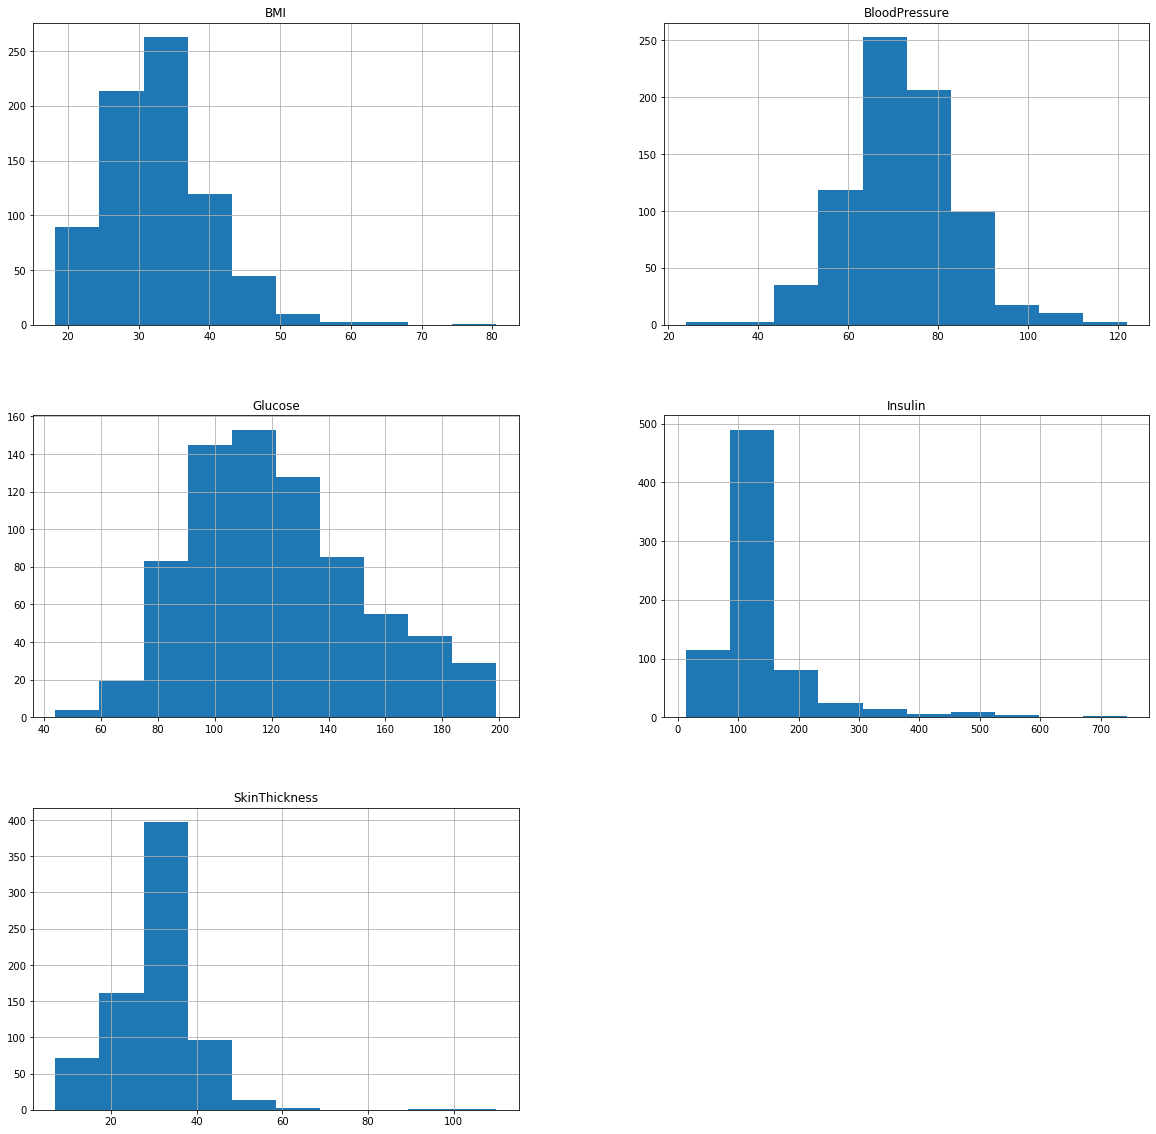

In [69]:
df_copy_filled.hist(figsize=(20, 20));

In [70]:
df_copy.reset_index(inplace=True)
df_copy

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...,...
739,1564,1,100.0,62.0,NaN,NaN,64.4,0.152,36,0
740,1565,0,163.0,40.0,23.0,64.0,40.7,0.322,33,0
741,1566,6,139.0,84.0,37.0,NaN,50.7,0.320,50,1
742,1567,2,167.0,44.0,30.0,140.0,52.7,0.452,28,0


In [71]:
df_copy_filled[:5]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,138.0,62.000000,35.0,126.0,33.6
1,84.0,82.000000,31.0,125.0,38.2
2,145.0,72.261972,29.0,126.0,44.2
3,135.0,68.000000,42.0,250.0,42.3
4,139.0,62.000000,41.0,480.0,40.7


In [72]:
df_copy = pd.concat([df_copy[['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Outcome']], df_copy_filled], axis=1, copy=True)

In [73]:
df_copy.isna().sum()

Pregnancies                 0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
dtype: int64

In [80]:
np.random.seed(42)

# Split the data
X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

# Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)

# Fit the model
clf.fit(X_train, y_train)

# Score the model
clf.score(X_test, y_test)

0.7651006711409396

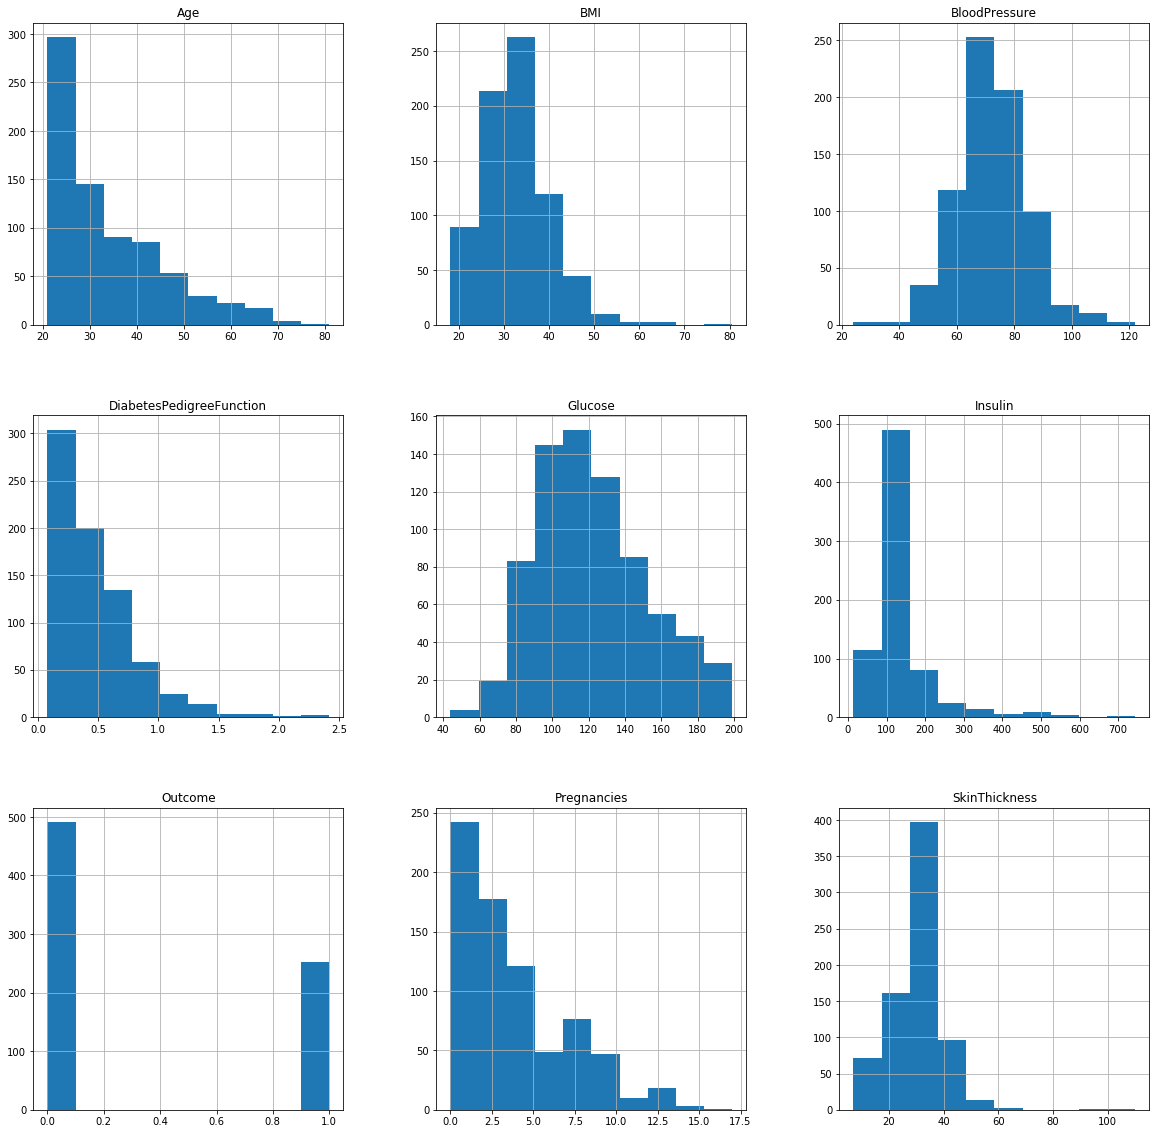

In [81]:
df_copy.hist(figsize=(20, 20));

In [86]:
np.random.seed(42)

# Instantiate xgb
xg_reg = xgb.XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=400, verbosity=0,
                              silent=True, objective='binary:logistic', booster='gbtree')

# Fit the model
xg_reg.fit(X_train, y_train)

# Score the model
xg_reg.score(X_test, y_test)

0.7114093959731543

In [87]:
len(df_copy[df_copy['Outcome'] == 0]), len(df_copy[df_copy['Outcome'] == 1])

(491, 253)

In [88]:
# Cross_val_score
cv_data = np.mean(cross_val_score(clf, X, y))
cv_data

0.7419644476691457

In [89]:
# Cross_val_score with xgboost (you're welcome david)
cv_data = np.mean(cross_val_score(xg_reg, X, y))
cv_data

0.7217213858153455

In [98]:
np.random.seed(42)

df_copy_0 = df_copy[df_copy['Outcome'] == 0][:253]

In [99]:
df_copy_1 = df_copy[df_copy['Outcome'] == 1]

In [115]:
df_shuffled = pd.concat([df_copy_0, df_copy_1], axis=0, copy=True)
df_shuffled = df_shuffled.sample(frac=1)

In [126]:
# Setup random seed
np.random.seed(42)

# Split data
X = df_shuffled.drop('Outcome', axis=1)
y = df_shuffled['Outcome']

# Train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
clf = RandomForestClassifier(n_jobs=-1)

# Fit model
clf.fit(X_train, y_train)

# Score model
clf.score(X_test, y_test)

0.7549019607843137

In [127]:
cv_shuffled = np.mean(cross_val_score(clf, X, y))

In [128]:
cv_shuffled

0.7370995923121724

In [ ]:
### Congratulation!! All doneeeeeeee :D :D .